Tutorial 3: Galaxies
====================

In this example, we'll use the `mass_profiles` and `light_profiles` modules introduced previously, along with the
`galaxy` module to create `Galaxy` objects in **PyAutoLens**. we'll see that:

1) `Galaxy`'s can be made from multiple `LightProfile`'s and `MassProfile`'s.

2) By taking multiple components, the summed image / deflection angle`s of the profiles are computed.

3) `Galaxy`'s have redshifts, defining where they are relative to one another in lensing calculations.

In [1]:
#%matplotlib inline
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


Lets use an identical `Grid2D` to the previous example.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05, sub_size=2)

Lets make a `Galaxy` with an `EllipticalSersic` `LightProfile`, by making an `EllipticalSersic` `LightProfile`.and 
passing it to a `Galaxy` object.

In [3]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

galaxy_with_light_profile = al.Galaxy(redshift=0.5, light=sersic_light_profile)

print(galaxy_with_light_profile)

Redshift: 0.5
Light Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In the previous example, we passed `Grid2D`'s to the `LightProfile` module to compute its image. We can do the 
exact same  with `Galaxy`'s to again compute the `Galaxy`'s image.

In [4]:
galaxy_image = galaxy_with_light_profile.image_from_grid(grid=grid)

print("intensity of `Grid2D` pixel 0:")
print(galaxy_image.native[0, 0])
print("intensity of `Grid2D` pixel 1:")
print(galaxy_image.native[0, 1])
print("intensity of `Grid2D` pixel 2:")
print(galaxy_image.native[0, 2])
print("etc.")

intensity of `Grid2D` pixel 0:
0.04538426447251817
intensity of `Grid2D` pixel 1:
0.04593933816109038
intensity of `Grid2D` pixel 2:
0.046499005272481395
etc.


A galaxy `Plotter` allows us to the plot the image, just like the `Profile` mat_plot_2d did for a `LightProfile`'s.

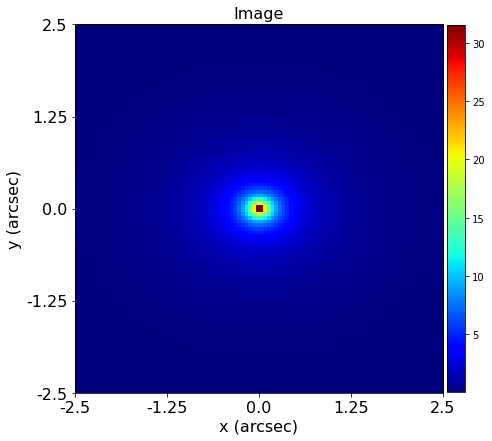

In [5]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_light_profile, grid=grid)
galaxy_plotter.figures(image=True)

We can pass galaxies as many profiles as we like. Lets create a `Galaxy` with three `LightProfile`'s.

In [6]:
light_profile_1 = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=2.5
)

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=3.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(1.0, -1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

galaxy_with_3_light_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
)

print(galaxy_with_3_light_profiles)

Redshift: 0.5
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5
SphericalSersic
centre: (1.0, 1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 3.0
SphericalSersic
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 2.0


If we plot the galaxy, we see 3 blobs of light!

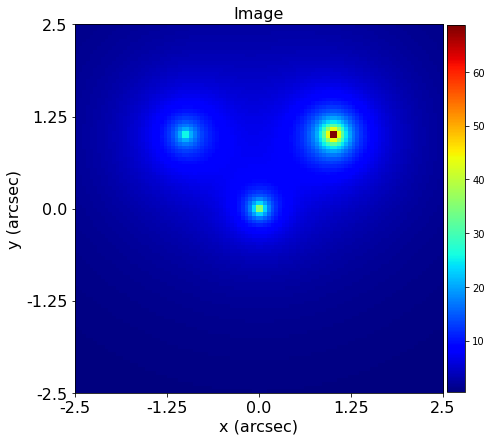

In [7]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_3_light_profiles, grid=grid)
galaxy_plotter.figures(image=True)

We can also plot each individual `LightProfile` using the `subplot` galaxy mat_plot_2d.

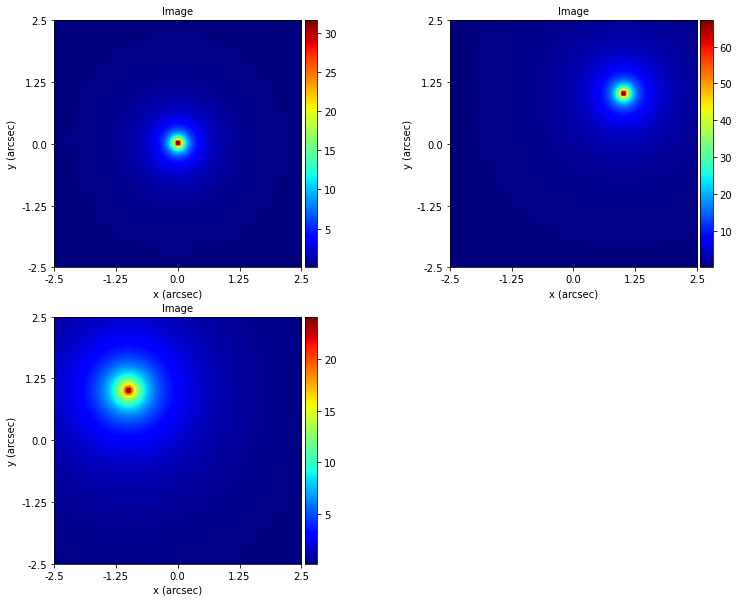

In [8]:
galaxy_plotter.subplot_of_light_profiles(image=True)

`MassProfile`'s interact with `Galaxy` objects in the exact same way as `LightProfile`'s. Lets create a `Galaxy` with three 
`SphericalIsothermal` `MassProfile`'s. 

In [9]:
mass_profile_1 = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)

mass_profile_2 = al.mp.SphericalIsothermal(centre=(1.0, 1.0), einstein_radius=1.0)

mass_profile_3 = al.mp.SphericalIsothermal(centre=(1.0, -1.0), einstein_radius=1.0)

galaxy_with_3_mass_profiles = al.Galaxy(
    redshift=0.5, mass_1=mass_profile_1, mass_2=mass_profile_2, mass_3=mass_profile_3
)

print(galaxy_with_3_mass_profiles)

Redshift: 0.5
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, 1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0


We can use a `Galaxy` `Plotter`.to plot these deflection angles. (Deflection angles of `MassProfile`'s add together just 
like the `LightProfile` image's above)

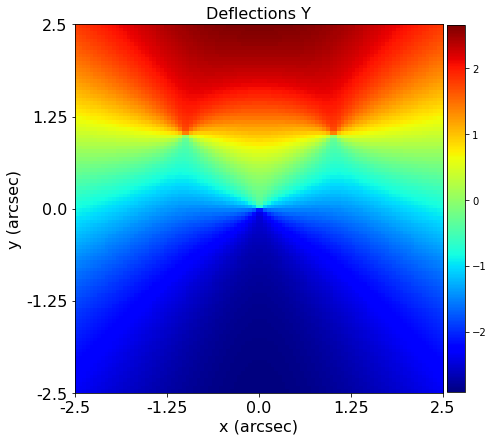

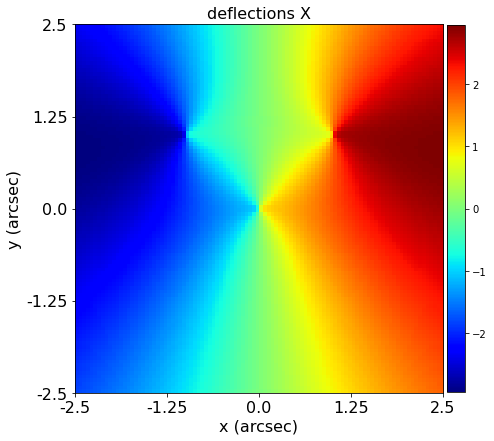

In [10]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_3_mass_profiles, grid=grid)
galaxy_plotter.figures(deflections_y=True, deflections_x=True)

I wonder what 3 summed convergence maps or potential`s look like ;)

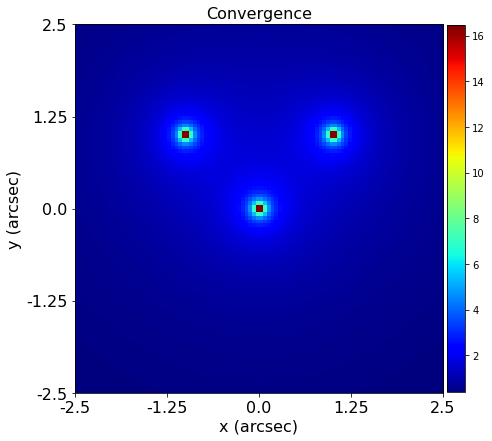

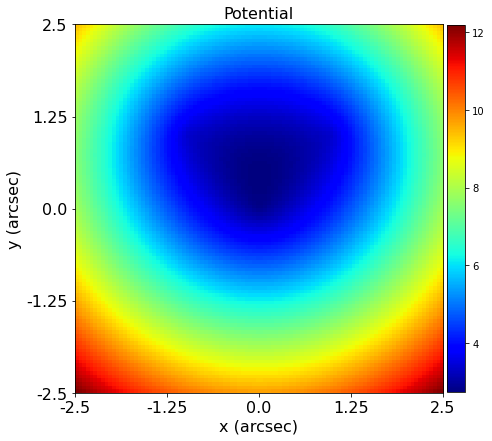

In [11]:
galaxy_plotter.figures(convergence=True, potential=True)

Finally, a `Galaxy` can take both light and mass profiles, and there is no limit to how many we pass it.

In [12]:
light_profile_1 = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(2.0, 2.0), intensity=1.0, effective_radius=3.0, sersic_index=3.0
)

light_profile_4 = al.lp.EllipticalSersic(
    centre=(1.0, -1.0),
    elliptical_comps=(0.3, 0.0),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=1.0,
)

mass_profile_1 = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)

mass_profile_2 = al.mp.SphericalIsothermal(centre=(1.0, 1.0), einstein_radius=2.0)

mass_profile_3 = al.mp.SphericalIsothermal(centre=(2.0, 2.0), einstein_radius=3.0)

mass_profile_4 = al.mp.EllipticalIsothermal(
    centre=(1.0, -1.0), elliptical_comps=(0.333333, 0.0), einstein_radius=2.0
)

galaxy_with_many_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
    light_4=light_profile_4,
    mass_1=mass_profile_1,
    mass_2=mass_profile_2,
    mass_3=mass_profile_3,
    mass_4=mass_profile_4,
)

Suffice to say, the `Galaxy`'s images, convergence, potential and deflections look pretty interesting.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


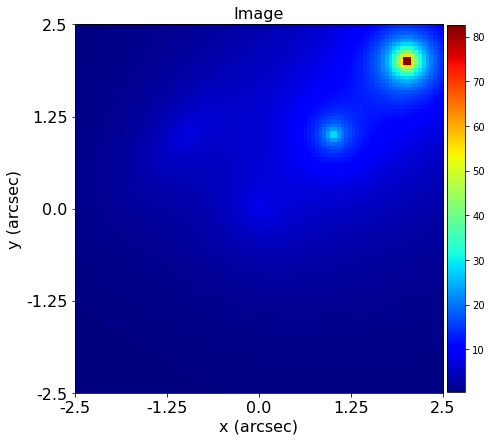

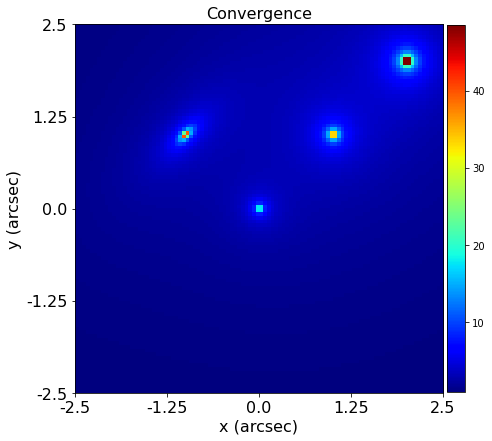

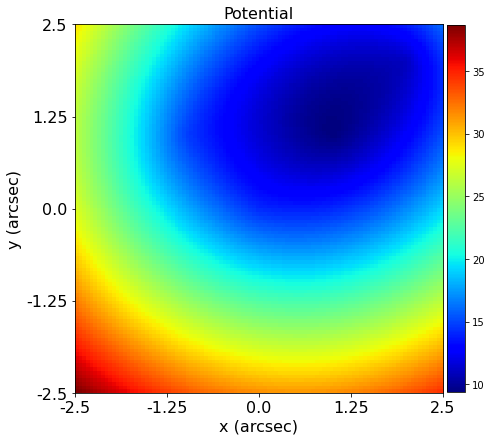

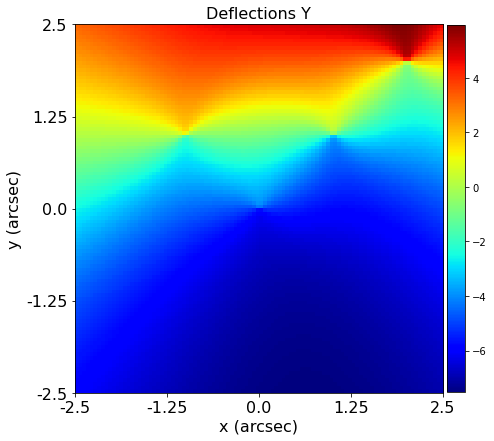

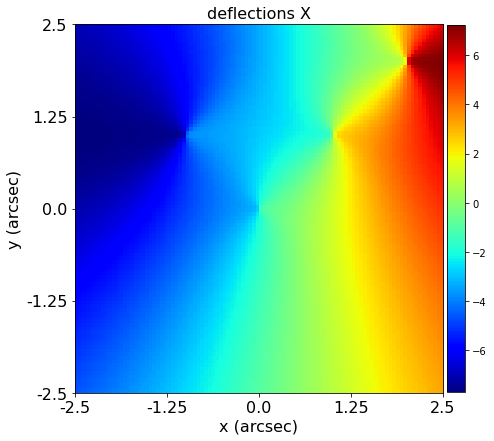

In [13]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_many_profiles, grid=grid)
galaxy_plotter.figures(
    image=True, convergence=True, potential=True, deflections_y=True, deflections_x=True
)

And we're done. Lets finished by just thinking about one question:

 1) We've learnt we can group profiles into `Galaxy`'s to essentially sum the contribution of each `LightProfile` to 
 the galaxy image's intensity, or sum the contribution of each `MassProfile` to the convergence, potential and 
 deflection angles. In strong lensing, there are often multiple galaxies next to one another responsible for the 
 lensing - how might we account for this?